<!-- dom:TITLE: Homework 1, PHY 959 -->
<!-- dom:AUTHOR: [PHY 959: Machine Learning in Physics]-->


# PHY 959: Homework Set #1
Due: **January 23, 2025**



___
***


# Problem 2: Maximum Likelihood and Linear Regression

In this problem we will explore linear regression using both our your own code as well as with modules imported from scikit-learn.  However, we'd also like to remind ourselves how similar linear regression is to maximum likelihood, so we will start by reminding ourselves about how that works!  We will use the Iris Flower dataset from Homework 1 Problem 1 to "seed" our fitting challenge with data.

As you should have been able to observe in Problem 1, there is a high degree of correlation between petal length and petal width.  We are going to perform a two parameter fit to this data of the form:

$f(x) = \theta_0 + \theta_1 \times x$

This linear relationship should match well with the correlation between petal length and width.  This problem will have three parts:

  * Find the maximum likelihood estimators for $\theta_0$ and $\theta_1$ for the Iris data
  * Write your own code to perform linear regression to find $\hat{f}(x)$ for the Iris data
  * Use imported modules from scikit-learn to perform linear regression to find $\hat{f}(x)$ for the Iris data

***

## Part 1:

The first thing we need to do is to remind ourselves how maximum likelihood works.  Use a Gaussian likelihood model to evaluate the ML estimators (MLEs) for the slope and intercept for a linear fit to the Iris Flowers dataset features petal width (abscissa or "x-axis") and petal length (ordinate or "y-axis").  Feel free to perform the maximum likelihood calculation numerically (stepping through values for each variable in a grid) or analytically (taking derivatives of the likelihood function).  If it helps you to visualize things, make a plot of the 2D likelihood function.  I've provided some starter code for splitting the data set into arrays.

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.0 1.3 1.4 1.0 1.5 1.0 1.4 1.3 1.4 1.5 1.0 1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.0 1.1 1.0 1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.0 1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.0 1.9 2.1 2.0 2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.0 2.0 1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.0 2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.0 2.3 1.8]


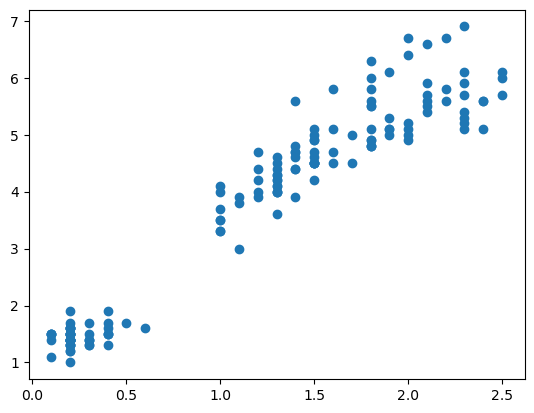

In [1]:
# visualize the data
import numpy as np
import pandas as pd
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

#break the array into individual arrays
array = dataset.values

#petal width
X1 = array[:,3]

#petal length
X2 = array[:,2]

#labels
y = array[:,4]

print(X1)

pyplot.scatter(X1,X2)
pyplot.show()

Maximum Likelihood Estimators:
Theta_0 (Intercept): 1.1010
Theta_1 (Slope): 2.2121


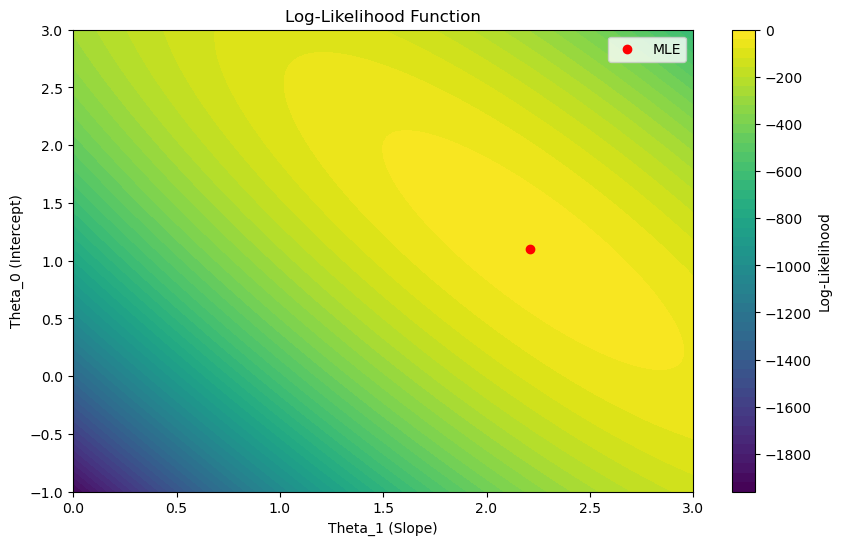

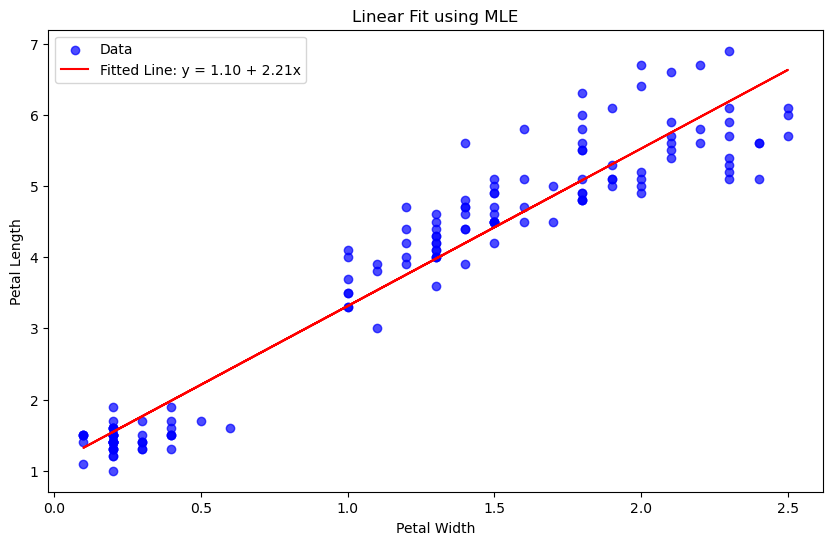

Predicted values (f̂(X)) using MLE:
[1.54343434 1.54343434 1.54343434 1.54343434 1.54343434 1.98585859
 1.76464646 1.54343434 1.54343434 1.32222222 1.54343434 1.54343434
 1.32222222 1.32222222 1.54343434 1.98585859 1.98585859 1.76464646
 1.76464646 1.76464646 1.54343434 1.98585859 1.54343434 2.20707071
 1.54343434 1.54343434 1.98585859 1.54343434 1.54343434 1.54343434
 1.54343434 1.98585859 1.32222222 1.54343434 1.32222222 1.54343434
 1.54343434 1.32222222 1.54343434 1.54343434 1.76464646 1.76464646
 1.54343434 2.42828283 1.98585859 1.76464646 1.54343434 1.54343434
 1.54343434 1.54343434 4.1979798  4.41919192 4.41919192 3.97676768
 4.41919192 3.97676768 4.64040404 3.31313131 3.97676768 4.1979798
 3.31313131 4.41919192 3.31313131 4.1979798  3.97676768 4.1979798
 4.41919192 3.31313131 4.41919192 3.53434343 5.08282828 3.97676768
 4.41919192 3.75555556 3.97676768 4.1979798  4.1979798  4.86161616
 4.41919192 3.31313131 3.53434343 3.31313131 3.75555556 4.64040404
 4.41919192 4.64040404 4.419

In [19]:
#Find the maximum likelihood estimators for $\theta_0$ and $\theta_1$ for the Iris data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Extract features and labels
array = dataset.values
X1 = array[:, 3].astype(np.float64)  # petal width (independent variable)
X2 = array[:, 2].astype(np.float64)  # petal length (dependent variable)

# Define a function to calculate the log-likelihood
def log_likelihood(theta_0, theta_1, X, Y):
    predictions = theta_0 + theta_1 * X
    residuals = Y - predictions
    likelihood = -0.5 * np.sum(residuals**2)  # Ignore constant terms
    return likelihood

# Create a grid of theta_0 and theta_1 values
theta_0_vals = np.linspace(-1, 3, 100)
theta_1_vals = np.linspace(0, 3, 100)
log_likelihood_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

# Evaluate the log-likelihood on the grid
for i, t0 in enumerate(theta_0_vals):
    for j, t1 in enumerate(theta_1_vals):
        log_likelihood_vals[i, j] = log_likelihood(t0, t1, X1, X2)

# Find the maximum likelihood estimators (MLEs)
max_idx = np.unravel_index(np.argmax(log_likelihood_vals), log_likelihood_vals.shape)
theta_0_mle = theta_0_vals[max_idx[0]]
theta_1_mle = theta_1_vals[max_idx[1]]

print(f"Maximum Likelihood Estimators:")
print(f"Theta_0 (Intercept): {theta_0_mle:.4f}")
print(f"Theta_1 (Slope): {theta_1_mle:.4f}")

# Plot the log-likelihood function
plt.figure(figsize=(10, 6))
plt.contourf(theta_1_vals, theta_0_vals, log_likelihood_vals, levels=50, cmap="viridis")
plt.colorbar(label="Log-Likelihood")
plt.scatter(theta_1_mle, theta_0_mle, color="red", label="MLE", zorder=5)
plt.xlabel("Theta_1 (Slope)")
plt.ylabel("Theta_0 (Intercept)")
plt.title("Log-Likelihood Function")
plt.legend()
plt.show()

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X1, X2, label="Data", color="blue", alpha=0.7)
plt.plot(X1, theta_0_mle + theta_1_mle * X1, label=f"Fitted Line: y = {theta_0_mle:.2f} + {theta_1_mle:.2f}x", color="red")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.title("Linear Fit using MLE")
plt.legend()
plt.show()

# Calculate the predicted values (f̂(X)) using MLE
f_hat_X_mle = theta_0_mle + theta_1_mle * X1

# Print the predicted values
print("Predicted values (f̂(X)) using MLE:")
print(f_hat_X_mle)


Intercept (theta_0) from scikit-learn: 1.0906
Slope (theta_1) from scikit-learn: 2.2259
Predicted values (f̂(X)) using scikit-learn:
[1.53574921 1.53574921 1.53574921 1.53574921 1.53574921 1.98092627
 1.75833774 1.53574921 1.53574921 1.31316068 1.53574921 1.53574921
 1.31316068 1.31316068 1.53574921 1.98092627 1.98092627 1.75833774
 1.75833774 1.75833774 1.53574921 1.98092627 1.53574921 2.2035148
 1.53574921 1.53574921 1.98092627 1.53574921 1.53574921 1.53574921
 1.53574921 1.98092627 1.31316068 1.53574921 1.31316068 1.53574921
 1.53574921 1.31316068 1.53574921 1.53574921 1.75833774 1.75833774
 1.53574921 2.42610333 1.98092627 1.75833774 1.53574921 1.53574921
 1.53574921 1.53574921 4.20681158 4.42940011 4.42940011 3.98422304
 4.42940011 3.98422304 4.65198864 3.31645745 3.98422304 4.20681158
 3.31645745 4.42940011 3.31645745 4.20681158 3.98422304 4.20681158
 4.42940011 3.31645745 4.42940011 3.53904598 5.0971657  3.98422304
 4.42940011 3.76163451 3.98422304 4.20681158 4.20681158 4.874577

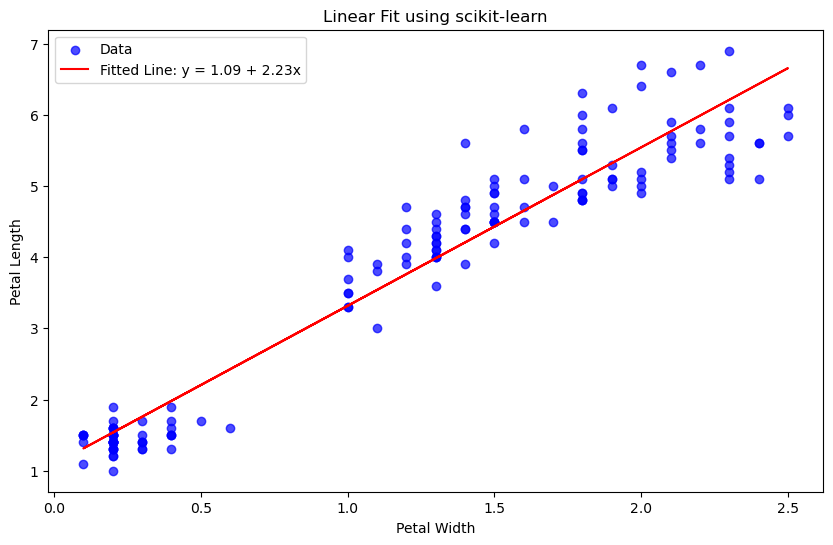

In [21]:
#Use imported modules from scikit-learn to perform linear regression to find predicted f(x) for the Iris data
from sklearn.linear_model import LinearRegression

# Reshape X1 to make it a 2D array (required by scikit-learn)
X1_reshaped = X1.reshape(-1, 1)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X1_reshaped, X2)

# Get the coefficients (theta_0 and theta_1)
theta_0_sklearn = model.intercept_
theta_1_sklearn = model.coef_[0]

# Print the coefficients
print(f"Intercept (theta_0) from scikit-learn: {theta_0_sklearn:.4f}")
print(f"Slope (theta_1) from scikit-learn: {theta_1_sklearn:.4f}")

# Calculate predicted values (cap f(X)) using scikit-learn model
f_hat_X_sklearn = model.predict(X1_reshaped)

# Print the predicted values
print("Predicted values (f̂(X)) using scikit-learn:")
print(f_hat_X_sklearn)

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X1, X2, label="Data", color="blue", alpha=0.7)
plt.plot(X1, f_hat_X_sklearn, label=f"Fitted Line: y = {theta_0_sklearn:.2f} + {theta_1_sklearn:.2f}x", color="red")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.title("Linear Fit using scikit-learn")
plt.legend()
plt.show()


## Linear Regression Model
The model we are fitting is:

$X_2 = \theta_0 + X_1 \cdot \theta_1$

Where:
$X_2$ is the target (petal length),
$X_1$ is the feature (petal width),
$\theta_0$ is the bias (intercept),
$\theta_1$ is the slope.

To simplify the equation and handle the bias term in matrix form, we use a design matrix 𝑀
This allows us to write the model equation as:

$Y = M \cdot \beta$

Where:
Y is the target (petal length).
M is the design matrix, which has two columns: the first column is all ones (representing the bias term), and the second column is the feature values (petal width).
β is the coefficient vector [$\theta_0 , \theta_1$] which contains the bias $\theta_0$ and the slope $\theta_1$.


## Part 2:

Now write code to perform a linear regression of the Iris Flowers petal width and length.  To do so, build a design matrix that includes a bias term (ie, the offset or $\theta_0$: $X_2 = \theta_0 + X_1\times \theta_1$).  If you use mean squared error, you can turn this into a relatively straight-forward linear algebra problem.  I strongly encourage you to use the NumPy `linalg` module to invert matrices (`np.linalg.inv()`) and to perform dot products (`np.linalg.dot()`).  You should be able to do all of this in less than 20 lines of code, so if you're finding yourself writing a novel please check with Prof. Fisher.

You will need to start by creating your design matrixm, $\mathcal{M}$.  Your goal is to use the same approach used on slide 21 of Lecture 3 to find the coefficients $\theta_0$ and $\theta_1$: $\beta = (\mathcal{M}^T \mathcal{M})^{-1} \mathcal{M}^TY$.  Note that the values $X_1$ are the pedal width and $X_2$ values are the petal length (as in the cell above).

### Part 2a:
Using the notation above or the name of the variable, what represents your targets in this problem?

### Part 2b:
Your coefficient vector has shape $2\times 1$ because it corresponds to two parameters.  What dimension should your design matrix take?  Note that $\mathcal{M}^T \mathcal{M}$ must be invertible, so it cannot be a vector.

### Answer 2a: 
In this problem, the targets are the petal lengths ($X_2$), as they represent the dependent variable or the values we are trying to predict based on the independent variable (petal widths, ($X_1$).

### Answer 2b: 
Dimension of design matrix M: 150×2 

In [17]:
#part 2
import numpy as np
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Break the dataset into individual arrays
array = dataset.values
X1 = array[:, 3].astype(np.float64)  # petal width (independent variable)
X2 = array[:, 2].astype(np.float64)  # petal length (dependent variable)

# Design matrix: Add a column of ones for the bias term (intercept)
M = np.column_stack((np.ones(X1.shape[0]), X1))  # (N, 2)

# Labels (Y) are petal length
Y = X2  # petal length (dependent variable)

# Solve for coefficients using the Normal Equation: beta = (M^T * M)^-1 * M^T * Y
# Ensure the matrices are of the correct numeric type (float64)
beta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(Y)

# Print out the design matrix M and labels Y to check
print("Design Matrix (M) printing first 10:\n", M[:10])  # Print first 5 rows
print("\nLabels (Y) printing first 10:\n", Y[:10])  # Print first 5 values of Y


# Display the coefficients (theta_0 and theta_1)
theta_knot, theta_1 = beta
print(f"Intercept (theta_0): {theta_knot}")
print(f"Slope (theta_1): {theta_1}")



Design Matrix (M) printing first 10:
 [[1.  0.2]
 [1.  0.2]
 [1.  0.2]
 [1.  0.2]
 [1.  0.2]
 [1.  0.4]
 [1.  0.3]
 [1.  0.2]
 [1.  0.2]
 [1.  0.1]]

Labels (Y) printing first 10:
 [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5]
Intercept (theta_0): 1.0905721458773785
Slope (theta_1): 2.2258853065539093


Once you have worked out the form of your design matrix $\mathcal{M}$ and your labels $Y$, use the numpy linear algebra module to solve for your parameters $\beta$, i.e. $\theta_0$ and $\theta_1$.

### Part 2c:
Print out your fitted parameters.  Be sure to indicate which variable is the bias and which is the slope parameter.

### Part 2d:
Make a plot of the data along with your linear regression fit.  Does it make sense to you?

### Part 2e:
Calculate the loss function for this data set. We're assuming mean squared error, so that should be a one-liner.  But if you're going to use that calculation a lot in the future, you may want to define a function.


## Part 2c:
Print out your fitted parameters. Be sure to indicate which variable is the bias and which is the slope parameter.

In [10]:
# 2c: Print out your fitted parameters. Be sure to indicate which variable is the bias and which is the slope parameter
import numpy as np
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Break the dataset into individual arrays
array = dataset.values
X1 = array[:, 3].astype(np.float64)  # petal width (independent variable)
X2 = array[:, 2].astype(np.float64)  # petal length (dependent variable)

# Design matrix: Add a column of ones for the bias term (intercept)
M = np.column_stack((np.ones(X1.shape[0]), X1))  # (N, 2)

# Labels (Y) are petal length (dependent variable)
Y = X2  # petal length (dependent variable)

# Solve for coefficients using the Normal Equation: beta = (M^T * M)^-1 * M^T * Y
beta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(Y)

# Display the coefficients (theta_0 and theta_1)
theta_knot, theta_1 = beta

# Print out the fitted parameters with labels
print(f"Fitted Parameters:")
print(f"Bias (theta_0): {theta_knot}  # Intercept (value of petal length when petal width is zero)")
print(f"Slope (theta_1): {theta_1}  # Change in petal length for a unit change in petal width")


Fitted Parameters:
Bias (theta_0): 1.0905721458773785  # Intercept (value of petal length when petal width is zero)
Slope (theta_1): 2.2258853065539093  # Change in petal length for a unit change in petal width


### Fitted Parameters:

Bias (theta_0): 1.09  # Intercept (value of petal length when petal width is zero)

Slope (theta_1): 2.22  # Change in petal length for a unit change in petal width


## Part 2d:
Make a plot of the data along with your linear regression fit. Does it make sense to you?

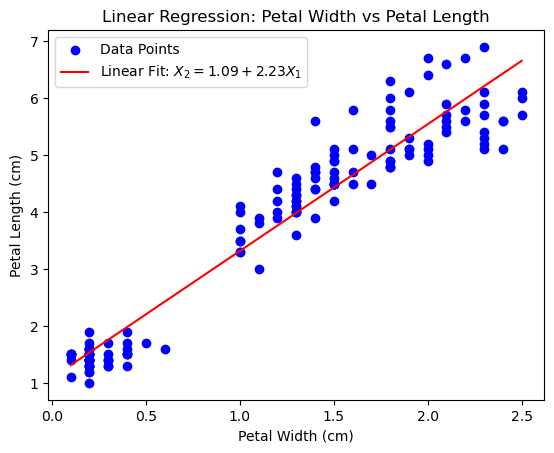

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Break the dataset into individual arrays
array = dataset.values
X1 = array[:, 3].astype(np.float64)  # petal width (independent variable)
X2 = array[:, 2].astype(np.float64)  # petal length (dependent variable)

# Design matrix: Add a column of ones for the bias term (intercept)
M = np.column_stack((np.ones(X1.shape[0]), X1))  # (N, 2)

# Labels (Y) are petal length (dependent variable)
Y = X2  # petal length (dependent variable)

# Solve for coefficients using the Normal Equation: beta = (M^T * M)^-1 * M^T * Y
beta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(Y)

# Extract the fitted parameters (theta_0 and theta_1)
theta_knot, theta_1 = beta

# Create a range of X values (petal width) to plot the regression line
X_range = np.linspace(min(X1), max(X1), 100)

# Calculate the corresponding Y values (petal length) using the regression equation
Y_range = theta_knot + theta_1 * X_range

# Create a scatter plot of the data
plt.scatter(X1, X2, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X_range, Y_range, color='red', label=f'Linear Fit: $X_2 = {theta_knot:.2f} + {theta_1:.2f}X_1$')

# Add labels and title
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Linear Regression: Petal Width vs Petal Length')
plt.legend()

# Show the plot
plt.show()


#### Yes, fit make sense because the red line fits well with the general trend of the blue points. Thus, linear model is a good fit.

## Part 2e:
Calculate the loss function for this data set. We're assuming mean squared error, so that should be a one-liner. But if you're going to use that calculation a lot in the future, you may want to define a function.

In [14]:
import numpy as np
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Break the dataset into individual arrays
array = dataset.values
X1 = array[:, 3].astype(np.float64)  # petal width (independent variable)
X2 = array[:, 2].astype(np.float64)  # petal length (dependent variable)

# Design matrix: Add a column of ones for the bias term (intercept)
M = np.column_stack((np.ones(X1.shape[0]), X1))  # (N, 2)

# Labels (Y) are petal length (dependent variable)
Y = X2  # petal length (dependent variable)

# Solve for coefficients using the Normal Equation: beta = (M^T * M)^-1 * M^T * Y
beta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(Y)

# Extract the fitted parameters (theta_0 and theta_1)
theta_knot, theta_1 = beta

# Predicted values (Y_hat) from the regression model
Y_hat = M.dot(beta)

# Calculate Mean Squared Error (MSE) in one line
mse = np.mean((Y - Y_hat) ** 2)

print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.2261


### Part 2f:
Reflection.  Was that easier or harder to evaluate compared to the MLE approach?

Answer 2f : MSE is easier to evaluate as it involves straightforward linear algebra with fewer computational steps, while MLE requires maximizing the likelihood, which is more complex and computationally intensive. Both methods yield similar results under a Gaussian noise model, but MSE is more efficient here.

## Part 3:

Last part!  Now let's reach out to scikit-learn to see if we can use their tools to get the (hopefully!) same answer for the case of mean-squared error.  

### Part 3a:
Import the `linear_model` package from scikit-learn (`sklearn` module) and the `mean_squared_error` module from `sklearn.metrics`.  The latter will help you calculate the mean-squared error easily.  Following the example from the scikit-learn page, fit your data to find your coefficients (parameters).

### Part 3b: 
Did you get the same coefficients in your scikit-learn linear regression?  Hint: you should have!

In [16]:
#part 3a:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Extract features and labels
X1 = dataset['petal-width'].values.reshape(-1, 1)  # Reshape to make it 2D for scikit-learn
X2 = dataset['petal-length'].values  # Target (dependent variable)

# Fit the linear regression model
model = LinearRegression()
model.fit(X1, X2)

# Extract the fitted parameters
theta_knot = model.intercept_  # Bias (intercept)
theta_1 = model.coef_[0]  # Slope (coefficient)

# Calculate predictions and mean squared error
predictions = model.predict(X1)
mse = mean_squared_error(X2, predictions)

# Print results
print(f"Fitted parameters:")
print(f"Bias (theta_knot): {theta_knot}")
print(f"Slope (theta_1): {theta_1}")
print(f"Mean Squared Error (MSE): {mse}")


Fitted parameters:
Bias (theta_knot): 1.090572145877379
Slope (theta_1): 2.22588530655391
Mean Squared Error (MSE): 0.22605246212121197


#### part 3c: Yes, we got the same parameters $\theta_0$ and $\theta_1$